<a href="https://colab.research.google.com/github/Jasjot-Kaur/Credit_Card_Default_Prediction_ML_Classification/blob/main/Credit_Card_Default_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### **Importing Libraries**

In [37]:
# importing required libraries

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff 
%matplotlib inline 

import gc
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind_from_stats

from datetime import datetime 
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from plotly.subplots import make_subplots
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score, recall_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 50)


plt.style.use('ggplot')

### **Reading Data File**

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# upgrading the xlrd module to avoid the error in reading excel file
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import pandas as pd
from pathlib import Path

## JK's file path :
#src_file = Path.cwd() /  ''

#cred_df = pd.read_excel(src_file, header=1)


In [41]:
import pandas as pd
from pathlib import Path
src_file = Path.cwd() /  '/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 3/Credit Card Default Prediction _Jasjot Kaur/default of credit card clients.xls'

cred_df = pd.read_excel(src_file, header=1)


#### **Creating a copy of the original dataset**

In [42]:
# Creating the copy of the Orginal Data 
df_ccd= cred_df.copy()
df_ccd

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#**Feature Description**

**Following is the description of our features:**



*   ID: Unique ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars
*SEX: Gender (1 = male, 2 = female)
*EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
*MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
*AGE: Age in years
*Scale for PAY_0 to PAY_6 :
(-2, -1, 0 = paid duly, 1 = payment delay for one month, 2 = payment delay for 
two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
        *   PAY_0: Repayment status in September, 2005 (scale same as above)
        *   PAY_2: Repayment status in August, 2005 (scale same as above)
        *   PAY_3: Repayment status in July, 2005 (scale same as above)
        *   PAY_4: Repayment status in June, 2005 (scale same as above)
        *   PAY_5: Repayment status in May, 2005 (scale same as above)
        *   PAY_6: Repayment status in April, 2005 (scale same as above)
        *   PAY_0: Repayment status in September, 2005 (scale same as above
        *   PAY_2: Repayment status in August, 2005 (scale same as above)

*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment, our target variable (1=yes, 0=no)


In our dataset we got customer credit card transaction history for past 6 months, on basis of which we have to predict if customer will default or not.

In [43]:
df_ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [44]:
df_ccd.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,3.00e+04
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1.00e+06
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.00e+00
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.00e+00
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.00e+00
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,7.90e+01
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.00e+00
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.00e+00


In [45]:
df_ccd.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [46]:
# Getting the shape of rows and columns present in our dataset

print(f'There are {df_ccd.shape[0]} records and {df_ccd.shape[1]} features in the dataset')


There are 30000 records and 25 features in the dataset


In [47]:
# Getting all the feature names

print('Features in the dataset are:')
df_ccd.columns

Features in the dataset are:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#####**Null Values**

In [48]:
df_ccd.isnull().value_counts() 

ID     LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE    PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month
False  False      False  False      False     False  False  False  False  False  False  False  False      False      False      False      False      False      False     False     False     False     False     False     False                         30000
dtype: int64

In [49]:
# Checking the total number of null values in the dataset
print(f'Total null values are :{df_ccd.isnull().sum().sum()}')

#checking missing values for every individual feature
df_ccd.isnull().sum()

Total null values are :0


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

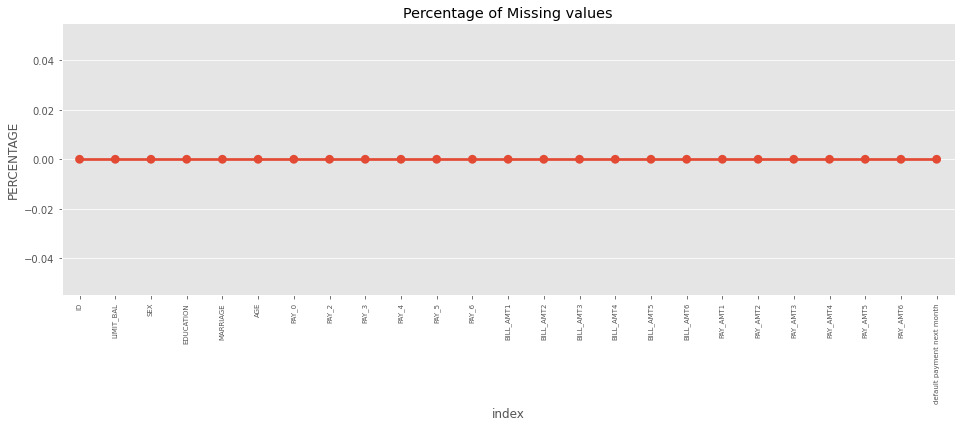

In [50]:
# Calualating the Missing Values in the data frame
missing = pd.DataFrame((df_ccd.isnull().sum())*100/df_ccd.shape[0]).reset_index()  #defining a dataframe to store percent of missing values present in the dataset
plt.figure(figsize= (16,5)) #defiing the size of the figure
ax = sns.pointplot('index', 0, data = missing) #plotting a point plot 
plt.xticks(rotation =90, fontsize = 7) #rorating the ticks of x axis for better visibility of the feature name
plt.title("Percentage of Missing values") #title of the plot
plt.ylabel("PERCENTAGE") #y label of the plot
plt.show()


Found that there are no Null Values in the Data Frame 

#####**Duplicate Values**

In [51]:
# Checking the duplicate values

duplicate_value = df_ccd.duplicated().sum()
print('Total number of duplicate values:', duplicate_value)

Total number of duplicate values: 0


In [52]:
# Rename the columns
df_ccd.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'CC_UsageSept',
                   'PAY_2': 'CC_UsageAug',
                   'PAY_3': 'CC_UsageJul',
                   'PAY_4': 'CC_UsageJun',
                   'PAY_5': 'CC_UsageMay',
                   'PAY_6': 'CC_UsageApr',
                   'BILL_AMT1': 'invoice_sept',
                   'BILL_AMT2': 'invoice_aug',
                   'BILL_AMT3': 'invoice_jul',
                   'BILL_AMT4': 'invoice_jun',
                   'BILL_AMT5': 'invoice_may',
                   'BILL_AMT6': 'invoice_apr',
                   'PAY_AMT1': 'total_amount_sept',
                   'PAY_AMT2': 'total_amount_aug',
                   'PAY_AMT3': 'total_amount_jul',
                   'PAY_AMT4': 'total_amount_jun',
                   'PAY_AMT5': 'total_amount_may',
                   'PAY_AMT6': 'total_amount_apr',
                   'dpnm' : 'default_payment',
                   'default payment next month':'IsDefaulter'}, inplace=True)


#####**Datatype Conversion**

In [53]:
# converting datatype of columns from int to object

df_ccd[['gender','education','marital_status','CC_UsageSept','CC_UsageAug','CC_UsageJul','CC_UsageJun','CC_UsageMay', 
        'CC_UsageApr']] = df_ccd[['gender','education','marital_status','CC_UsageSept','CC_UsageAug','CC_UsageJul','CC_UsageJun','CC_UsageMay',
        'CC_UsageApr']].apply(lambda x: x.astype('object'))

In [54]:
df_ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 30000 non-null  int64 
 1   credit_limit       30000 non-null  int64 
 2   gender             30000 non-null  object
 3   education          30000 non-null  object
 4   marital_status     30000 non-null  object
 5   age                30000 non-null  int64 
 6   CC_UsageSept       30000 non-null  object
 7   CC_UsageAug        30000 non-null  object
 8   CC_UsageJul        30000 non-null  object
 9   CC_UsageJun        30000 non-null  object
 10  CC_UsageMay        30000 non-null  object
 11  CC_UsageApr        30000 non-null  object
 12  invoice_sept       30000 non-null  int64 
 13  invoice_aug        30000 non-null  int64 
 14  invoice_jul        30000 non-null  int64 
 15  invoice_jun        30000 non-null  int64 
 16  invoice_may        30000 non-null  int64

In [55]:
# Setting the ID numbers as Index
df_ccd.set_index('ID', inplace = True)
df_ccd

,credit_limit,gender,education,marital_status,age,CC_UsageSept,CC_UsageAug,CC_UsageJul,CC_UsageJun,CC_UsageMay,CC_UsageApr,invoice_sept,invoice_aug,invoice_jul,invoice_jun,invoice_may,invoice_apr,total_amount_sept,total_amount_aug,total_amount_jul,total_amount_jun,total_amount_may,total_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [56]:
#checking of the renamed data  and changed datype data
df_ccd.head()

,credit_limit,gender,education,marital_status,age,CC_UsageSept,CC_UsageAug,CC_UsageJul,CC_UsageJun,CC_UsageMay,CC_UsageApr,invoice_sept,invoice_aug,invoice_jul,invoice_jun,invoice_may,invoice_apr,total_amount_sept,total_amount_aug,total_amount_jul,total_amount_jun,total_amount_may,total_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [57]:
df_ccd.tail()

,credit_limit,gender,education,marital_status,age,CC_UsageSept,CC_UsageAug,CC_UsageJul,CC_UsageJun,CC_UsageMay,CC_UsageApr,invoice_sept,invoice_aug,invoice_jul,invoice_jun,invoice_may,invoice_apr,total_amount_sept,total_amount_aug,total_amount_jul,total_amount_jun,total_amount_may,total_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


##**Handling Ouliers**

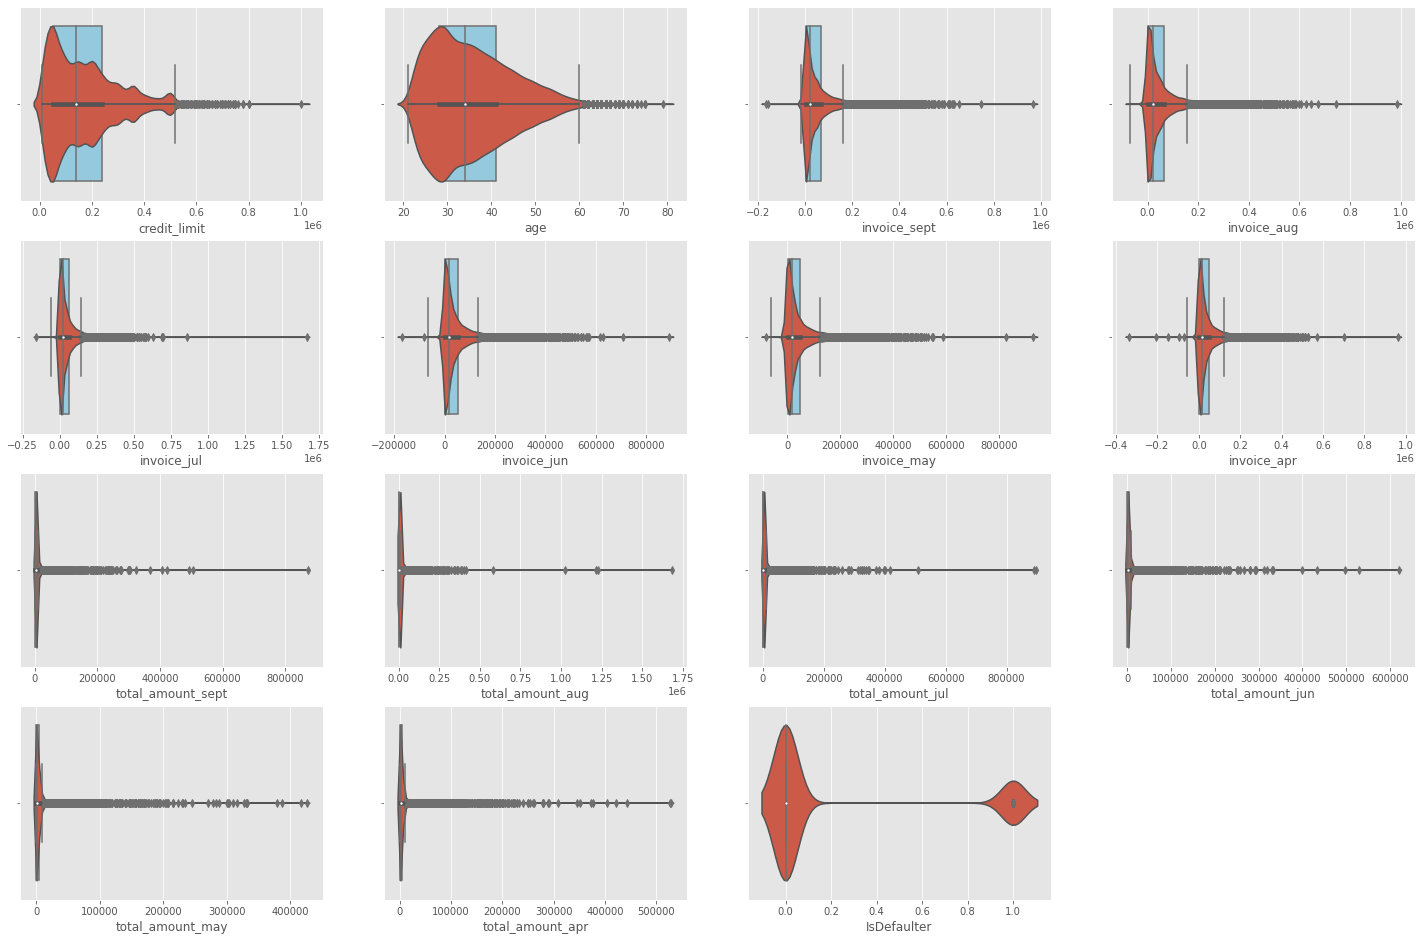

In [58]:
# lets check the distribution of dataset and if there are any outliers are present

# plotting a violin plot for all numerical features
feat_num = df_ccd.select_dtypes(include =['int64', 'float64'])

plt.figure(figsize=(25,25))
n=1

for column in feat_num:
  plt.subplot(6,4,n)
  n = n+1
  sns.boxplot(df_ccd[column], color ='skyblue' )
  sns.violinplot(df_ccd[column])

Detected outliers which need to be treated, in order to obtain good model and hence predictions.

### **Treating Outliers**

As the dataset does not follow exact normal distribution, we will use IQR method to detect the outliers and remove them.

For credit_limit Upper limit is 335000.0, and lower limit is -45000.0
For age Upper limit is 47.5, and lower limit is 21.5
For invoice_sept Upper limit is 98857.125, and lower limit is -28207.375
For invoice_aug Upper limit is 94517.0, and lower limit is -27526.0
For invoice_jul Upper limit is 88914.0, and lower limit is -26083.0
For invoice_jun Upper limit is 80595.625, and lower limit is -23762.875
For invoice_may Upper limit is 74404.25, and lower limit is -22450.75
For invoice_apr Upper limit is 73169.375, and lower limit is -22715.125
For total_amount_sept Upper limit is 7009.0, and lower limit is -1003.0
For total_amount_aug Upper limit is 7083.5, and lower limit is -1250.5
For total_amount_jul Upper limit is 6562.5, and lower limit is -1667.5
For total_amount_jun Upper limit is 5871.875, and lower limit is -1562.625
For total_amount_may Upper limit is 5921.0, and lower limit is -1637.0
For total_amount_apr Upper limit is 5941.125, and lower limit is -1823.375
For IsDefaulter Upp

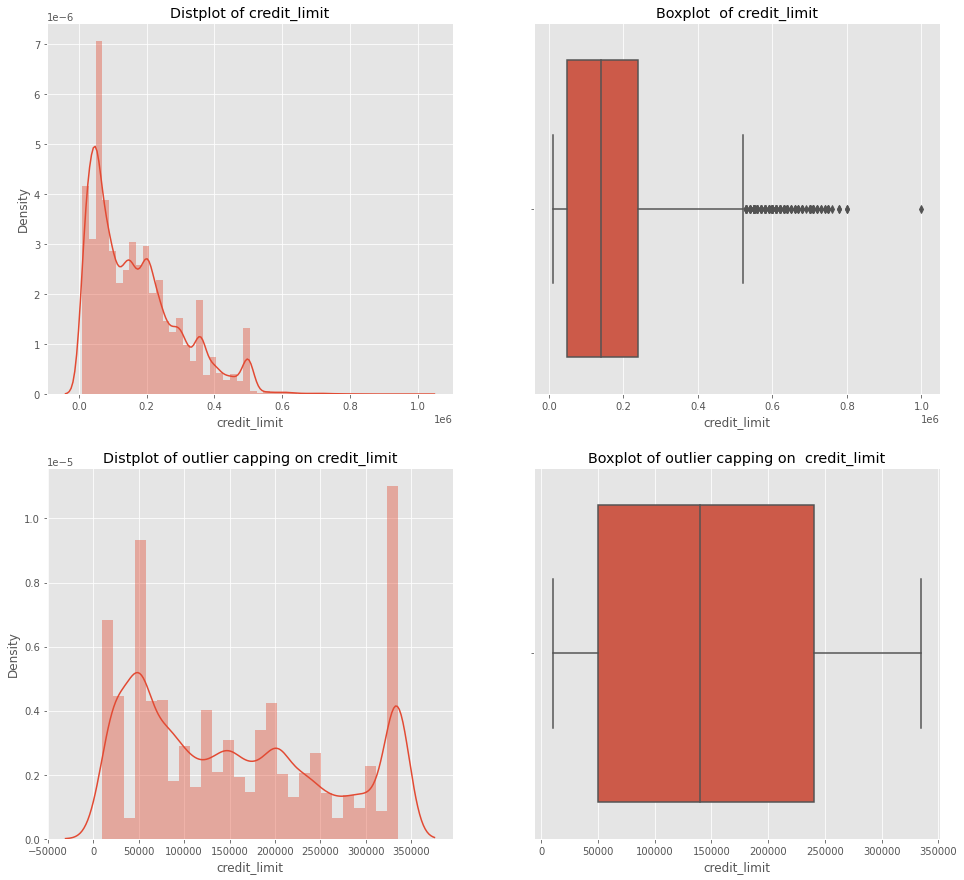

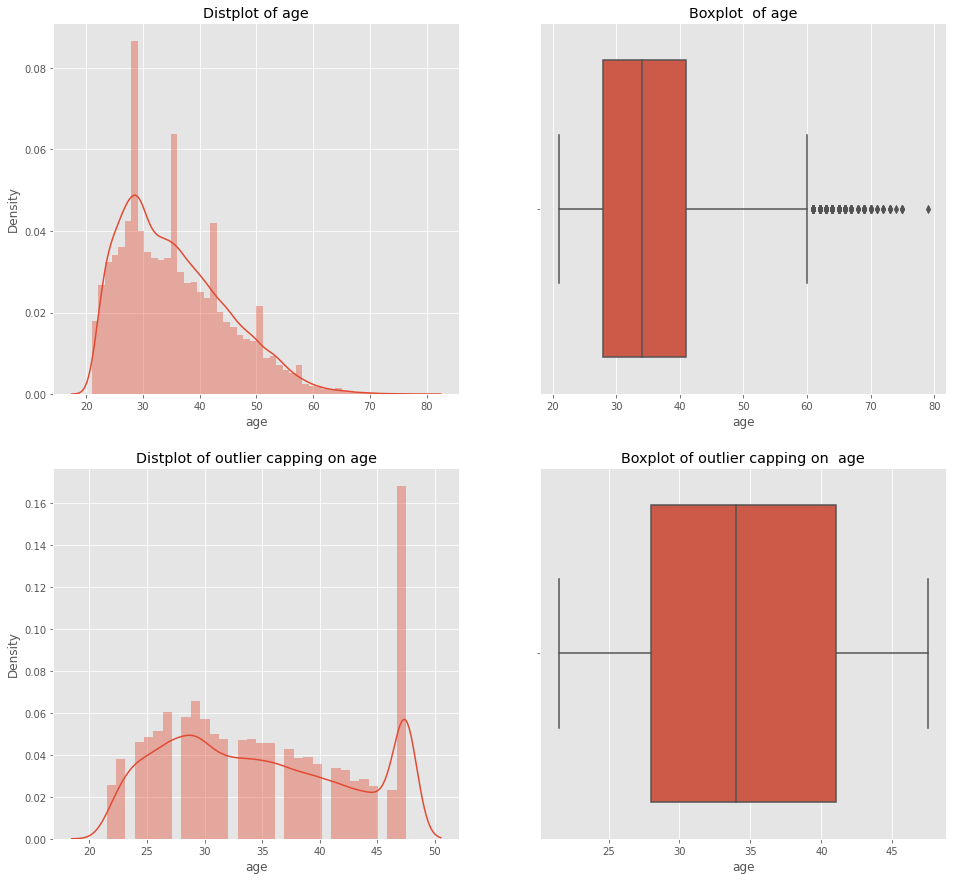

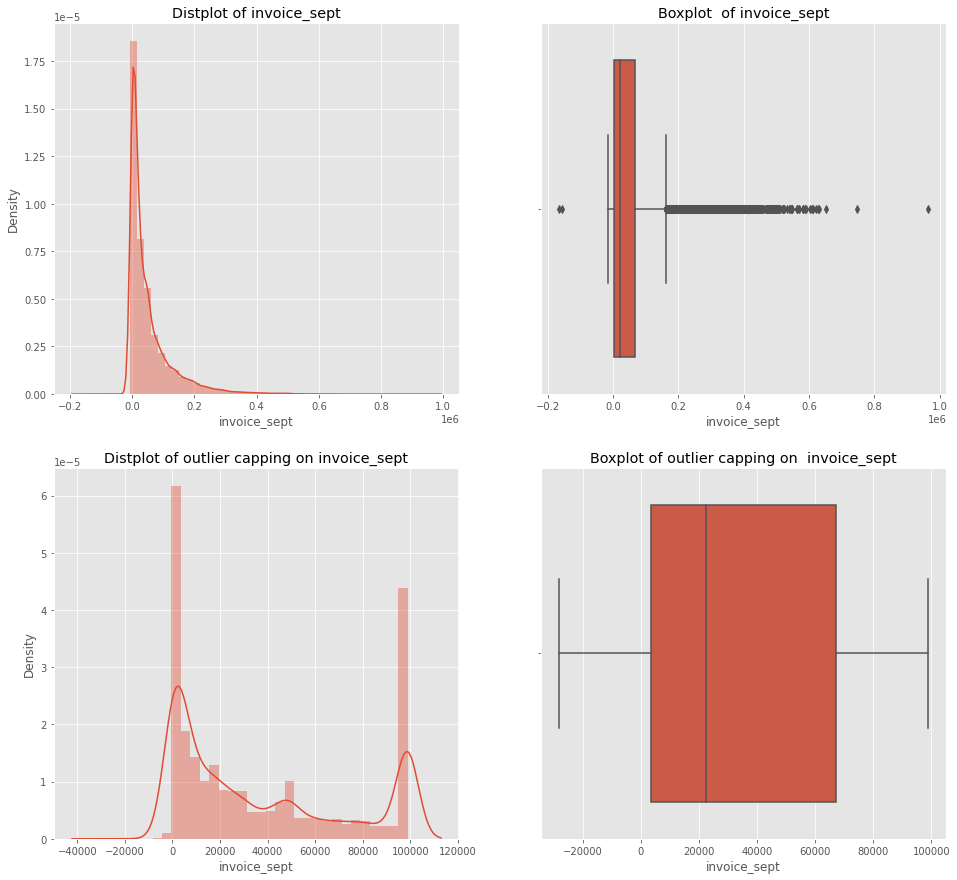

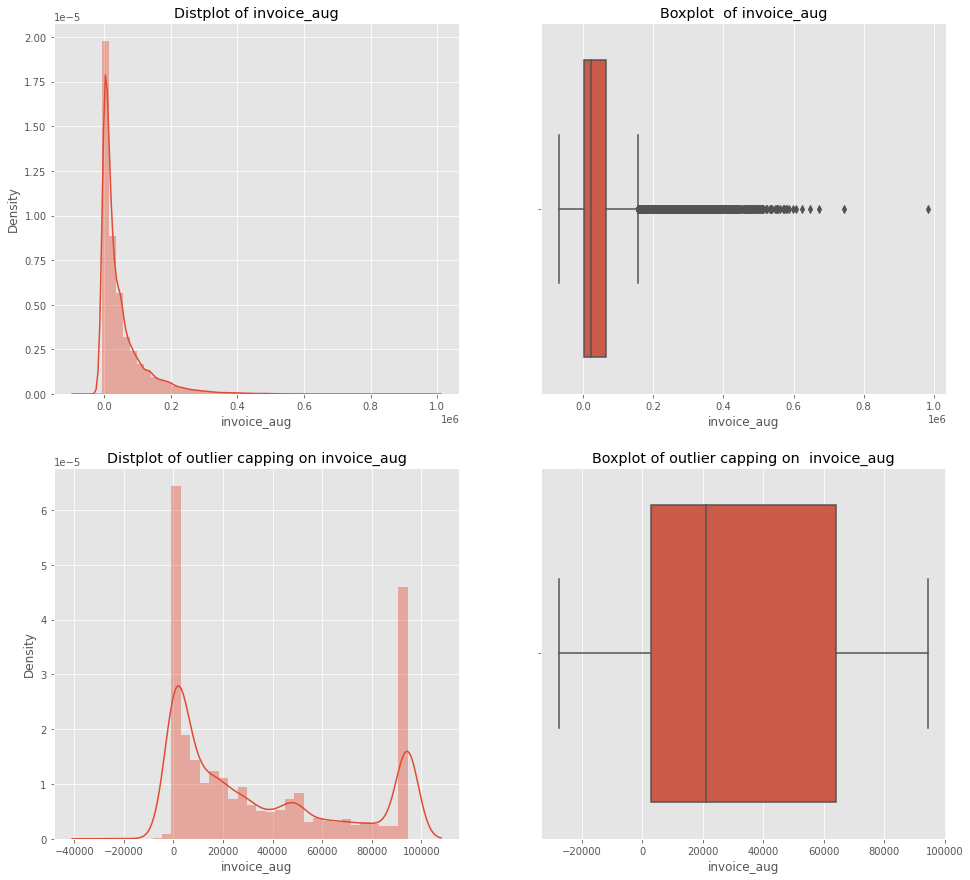

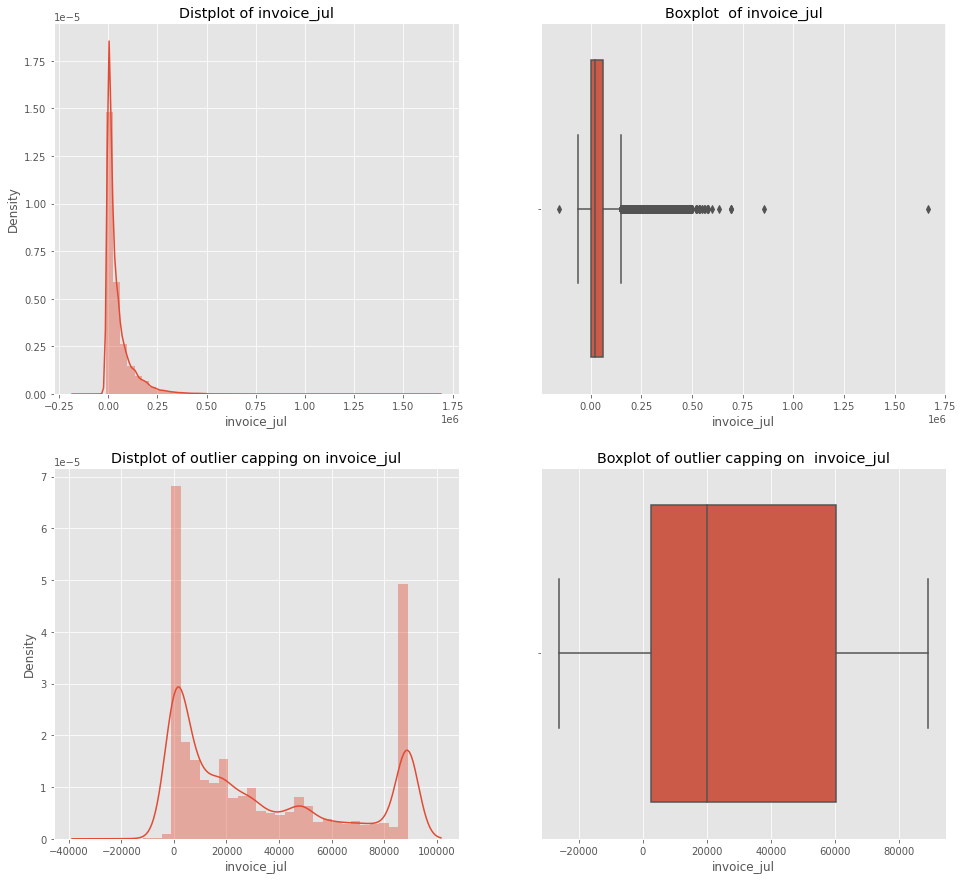

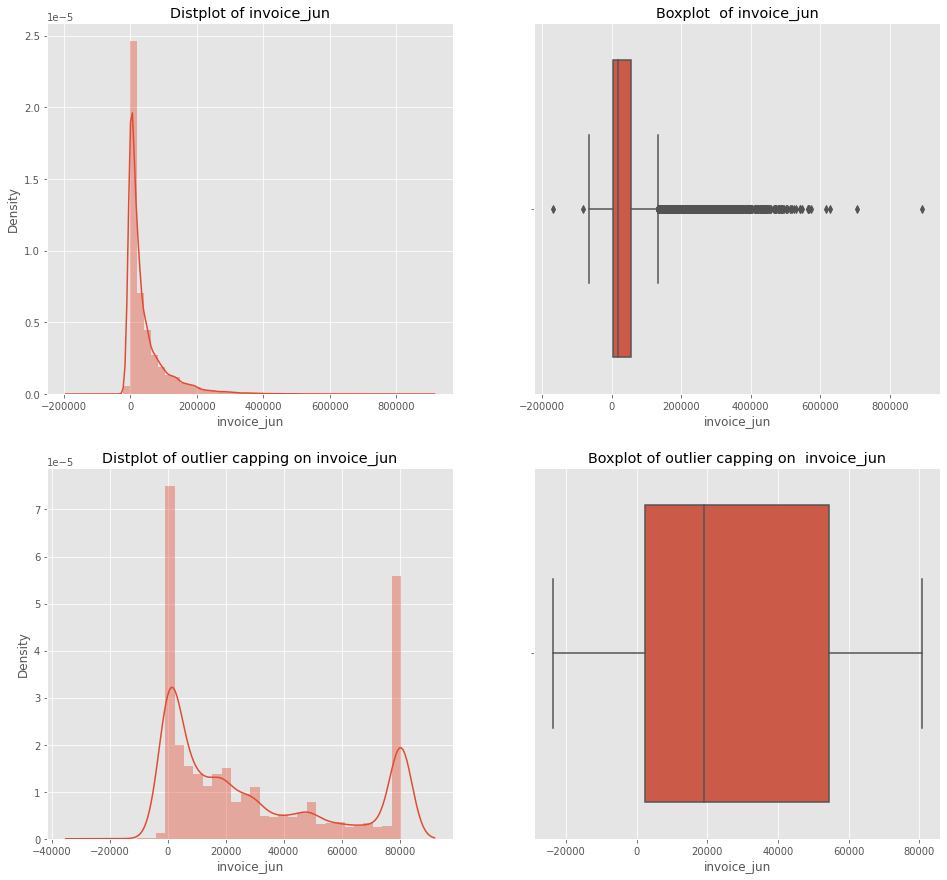

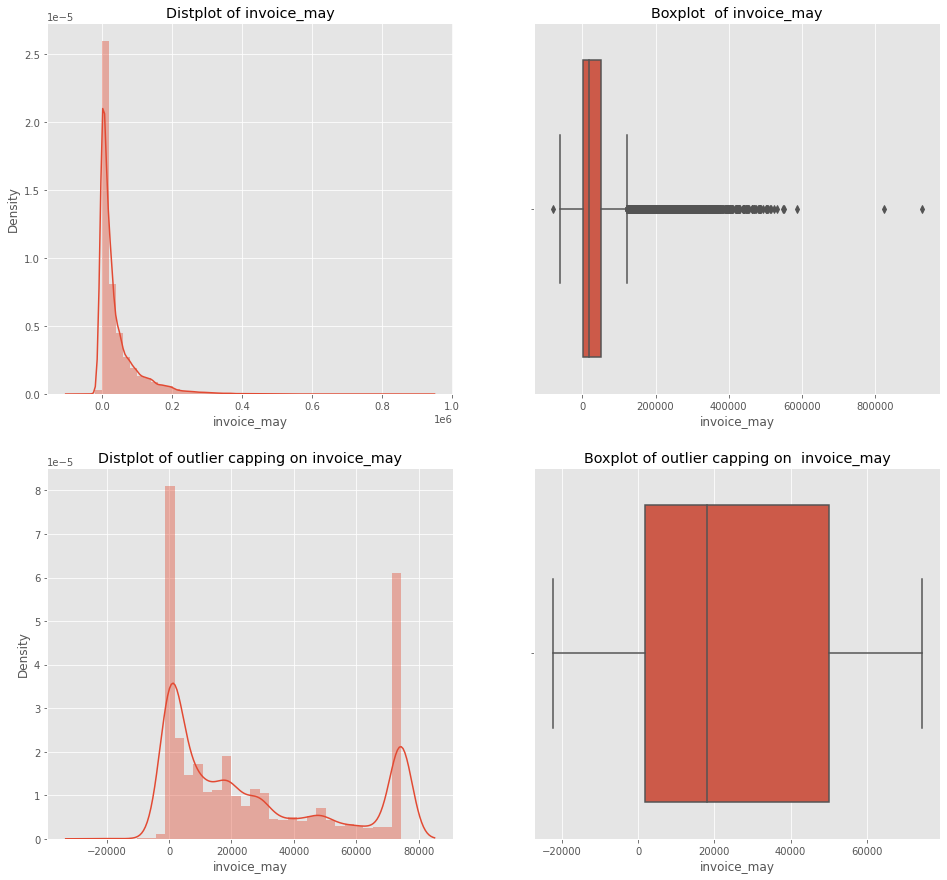

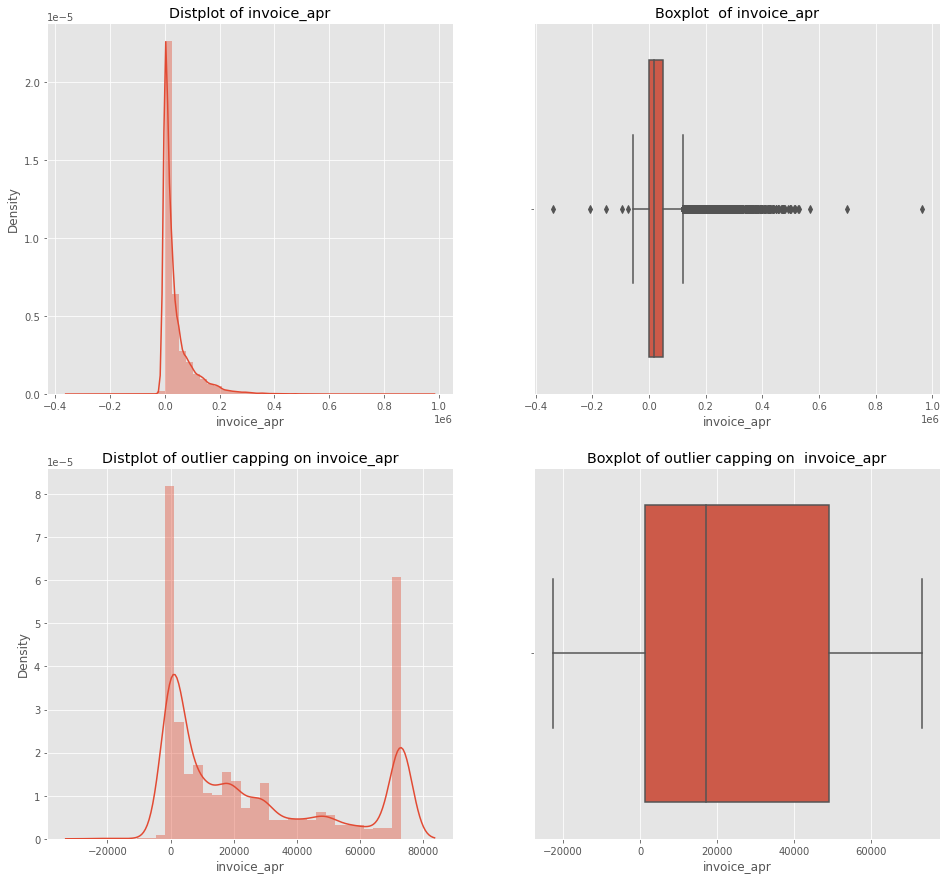

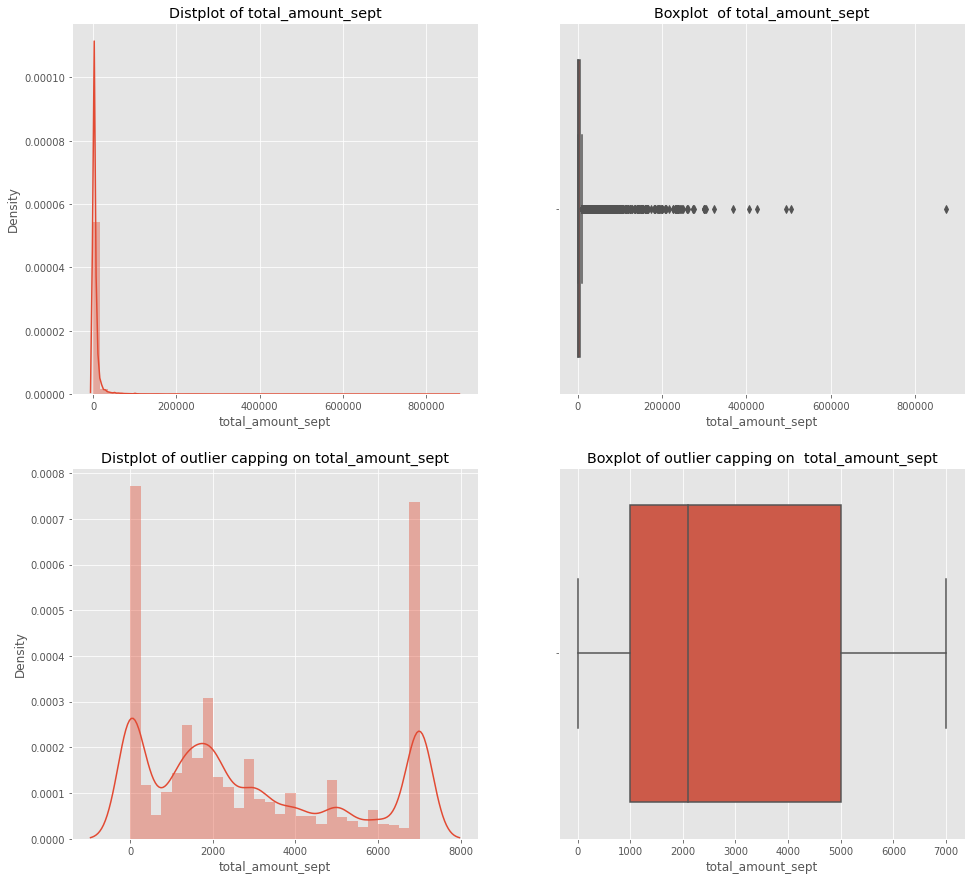

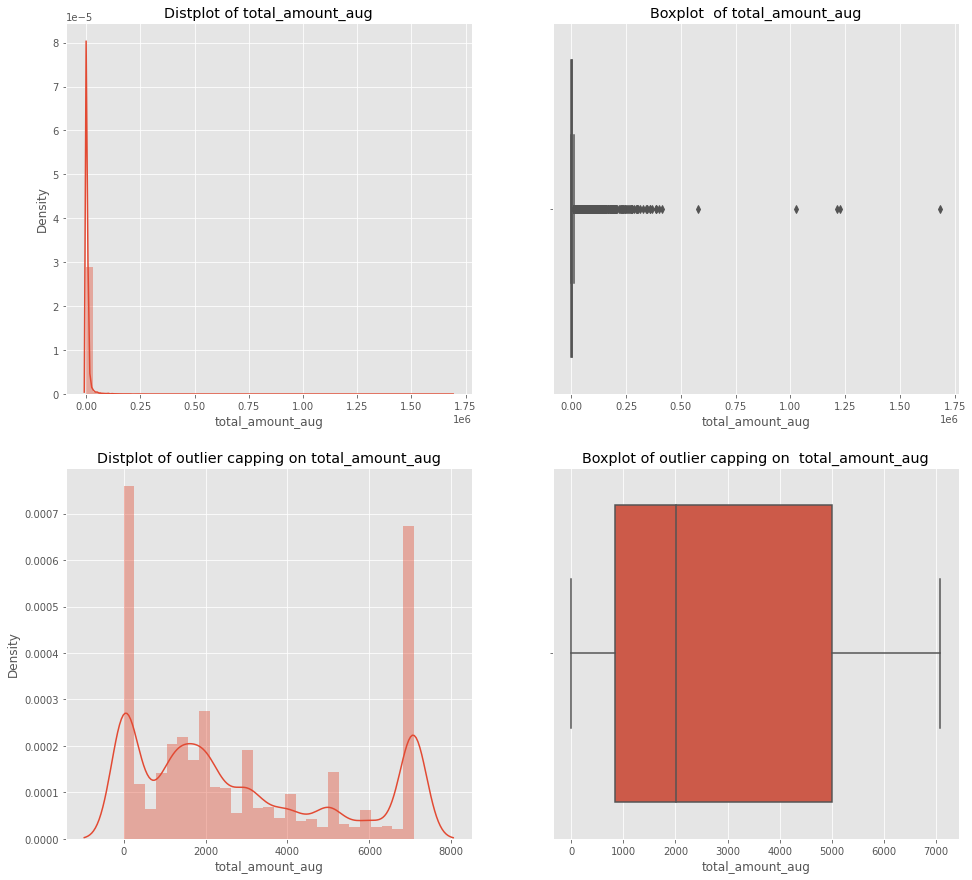

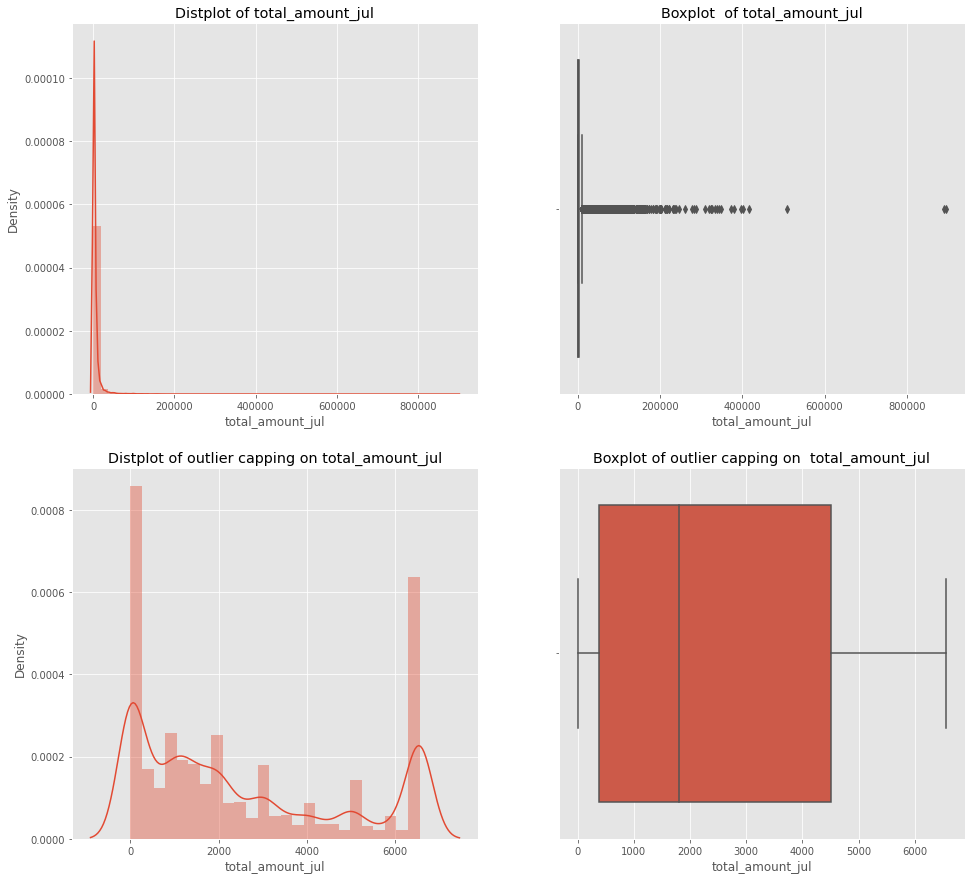

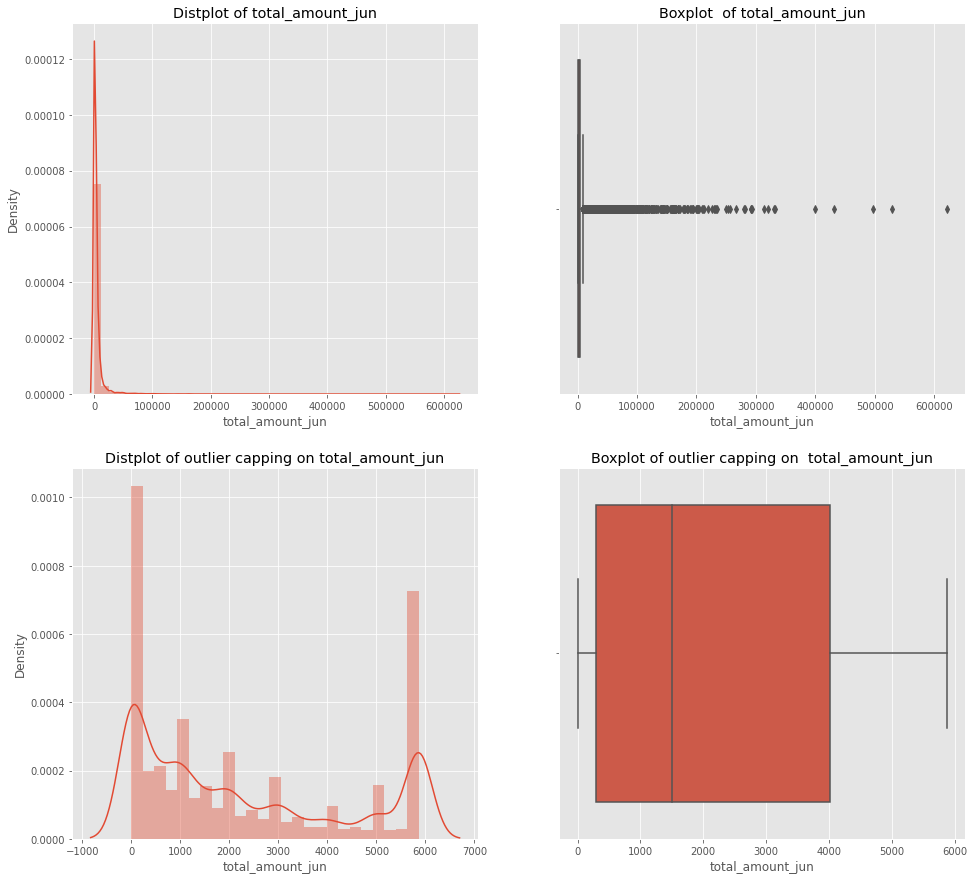

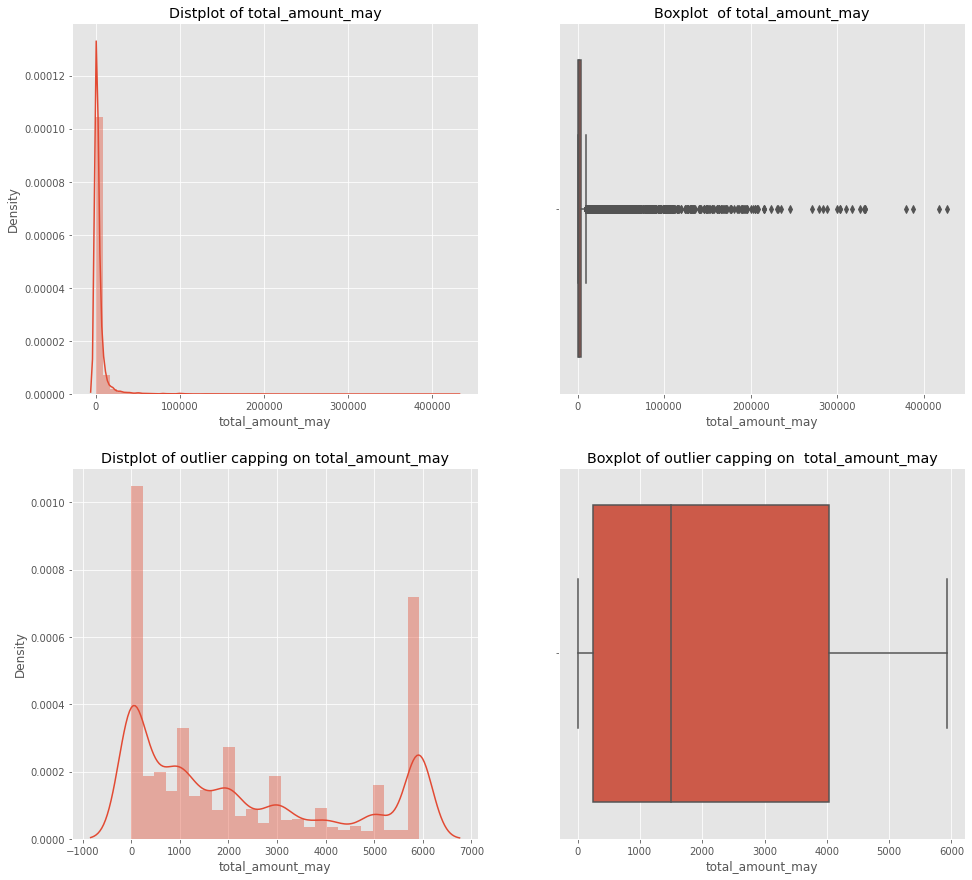

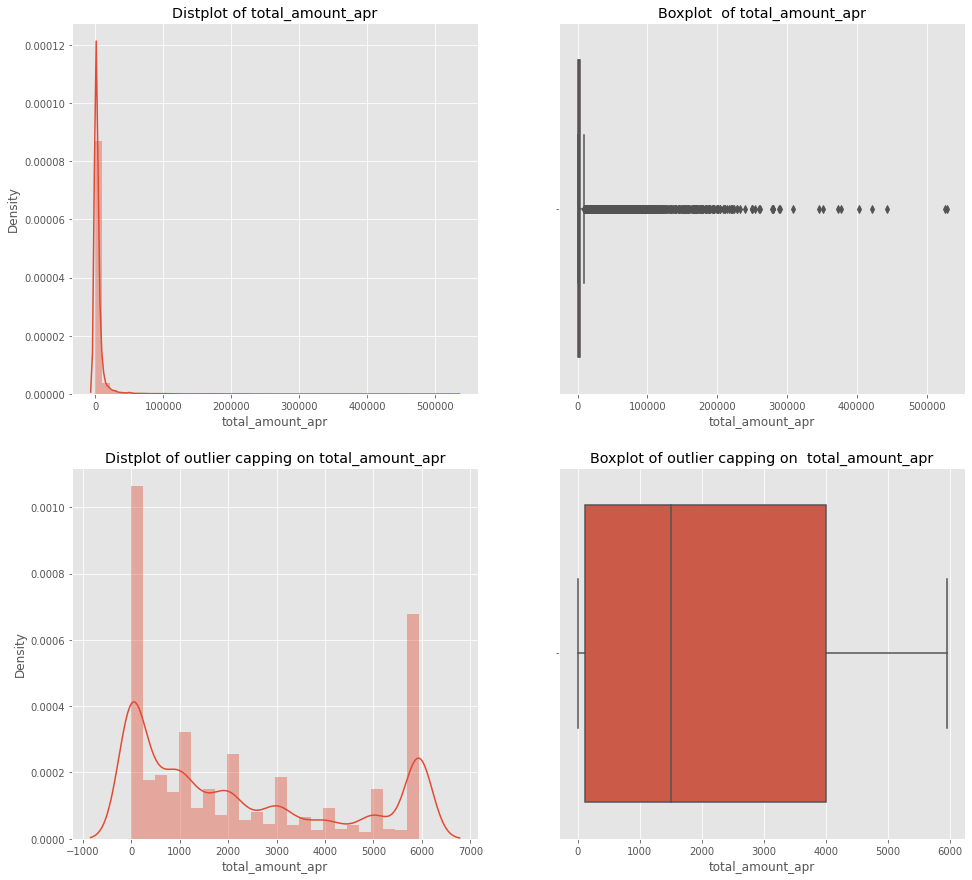

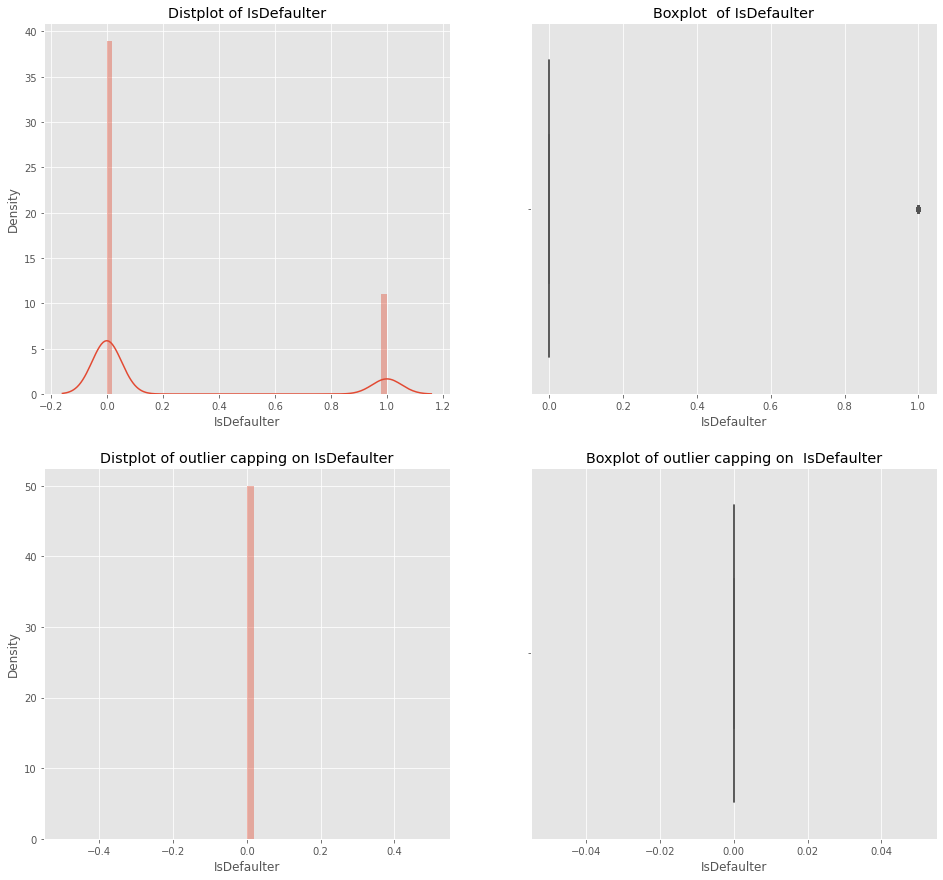

In [59]:
# creating a for loop to iterate over  and capp all the outliers on entire numerical features
for i in feat_num:
  percentile_25 = feat_num[i].quantile(0.25) #creating a variable for 25th percentile
  percentile_75 = feat_num[i].quantile(0.75) #creating a variable for 75th percentile
  iqr = percentile_75 - percentile_25 #calculating the  interquartile range
  upper_limit = percentile_25 + 1.5 * iqr # caculating the upper bound limit, above which the data will be considered outlier
  lower_limit = percentile_75 - 1.5 * iqr # # caculating the lower bound limit, below  which the data will be considered outlier

  print(f'For {i} Upper limit is {upper_limit}, and lower limit is {lower_limit}') # printing the upper and lower limit of each feature

  feat_num[df_ccd[i] > upper_limit] #to check the outlier record
  feat_num[df_ccd[i] < lower_limit] #to check the outlier record
  new_df_capped = feat_num.copy() #definig new dataframe to store the oulier capped dataset
  new_df_capped[i] = np.where(new_df_capped[i] > upper_limit, upper_limit, 
    np.where(new_df_capped[i] < lower_limit, lower_limit,new_df_capped[i])) # replacing the outliers with the  specifed limits

#ploting a figure to compare the difference in distribution of data
  plt.figure(figsize = (16,15)) 
  plt.subplot(2,2,1)
  sns.distplot(df_ccd[i])
  plt.title(f'Distplot of {i}')
  plt.subplot(2,2,2)
  sns.boxplot(df_ccd[i])
  plt.title(f'Boxplot  of {i}')
  plt.subplot(2,2,3)
  sns.distplot(new_df_capped[i])
  plt.title(f'Distplot of outlier capping on {i}')
  plt.subplot(2,2,4)
  sns.boxplot(new_df_capped[i])
  plt.title(f'Boxplot of outlier capping on  {i}')